## Machine learning for structured data - Regression

### Classification vs. regression

Regression and classification are categorized under the same umbrella of supervised machine learning. Both share the same concept of utilizing known datasets (referred to as training datasets) to make predictions.

The main difference between them is that the output variable in regression is numerical (or continuous) while that for classification is categorical (or discrete).

### Linear regression
A linear regression model assumes that the regression function E(Y|X) islinear in the inputsX1,...,Xp. Linear models were largely developed inthe precomputer age of statistics, but even in today’s computer era thereare still good reasons to study and use them. They are simple and oftenprovide an adequate and interpretable description of how the inputs affectthe output. For prediction purposes they can sometimes outperform fanciernonlinear models, especially in situations with small numbers of trainingcases, low signal-to-noise ratio or sparse data. Finally, linear methods can beapplied to transformations of the inputs and this considerably expands theirscope.

### Ensemble methods for regression

### Shallow neural networks

#### Neural networks
Neural networks are a large class of models and learning methods. The most traditional is the single hidden layer back-propagation network or a single layer perceptron.

![trad_nnetwork](./images/trad_nnetwork.svg)

The above networks belongs to a class of networks called feed-forward neural networks. The name comes from the fact that we calculate linear combinations of inputs at different layers, pass the results to a nonlinear activation function and feed the value forward. By combining these nonlinear functions of linear combinations into a network, we get a very powerful non-linear estimator.

Basically, deep learning just means that we add many layers to the network. (The paradigm of deep learning is a little bit *deeper* than that, but we do not go into details at this point.)

Despite the hype surrounding neural networks, they are no different from other nonlinear statistical models. They are just networks of neurons that calculate linear combinations of input values and input these linear combinations to nonlinear activation functions. The result is a powerful learning method, with widespread applications in many fields. The most successful neural network architectures in computer vision are convolutional neural networks that are introduced in more detail below. 

The termneural networkhas evolved to encompass a large class of modelsand learning methods. Here we describe the most widely used “vanilla” neu-ral net, sometimes called the single hidden layer back-propagation network,or single layer perceptron. There has been a great deal ofhypesurroundingneural networks, making them seem magical and mysterious. As we makeclear in this section, they are just nonlinear statistical models, much likethe projection pursuit regression model discussed above.A neural network is a two-stage regression or classificationmodel, typ-ically represented by anetwork diagramas in Figure 11.2.  This networkapplies both to regression or classification. For regression, typicallyK= 1and there is only one output unitY1at the top. However, these networkscan handle multiple quantitative responses in a seamless fashion, so we willdeal with the general case.

### Performance of regression models

#### Coefficient of determination

#### MSE and others

#### Scikit-learn

Scikit-learn is a multi-purpose machine learning library. It has modules for many different machine learning approaches. It is not the best library in any machine learning field but very good at most of them. Also, all the approaches use the common workflow approach of the library. Thus, by learning to do one machine learning analysis, you learn to do them all.

Scikit-learn has libraries for classification, regression, clustering, dimensionality reduction and model selection. It also has an extensive library of methods for data pre-processing.

A very convenient feature in Scikit-learn is **pipeline** that you can use to construct full workflows of machine learning analyses.

There should be no difficulties to install Scikit-learn. With Python/Pip you just execute **pip install scikit-learn** and with Anaconda you just install it from the menu (or use **conda install scikit-learn** in the command line). (Actually, you should not need to do that as Scikit-learn is installed in Anaconda by default.)

Again, the best way to learn Scikit-learn is by going through examples. Thus, more  details are in the following examples.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [77]:
plt.style.use('bmh')

Example data from [www.kaggle.com/c/companies-bankruptcy-forecast](https://www.kaggle.com/c/companies-bankruptcy-forecast)

In [78]:
table_df = pd.read_csv('ml_data.csv')[['Attr1','Attr8','Attr21','Attr4',
                                       'Attr5','Attr29','Attr20',
                                       'Attr15','Attr6','Attr44']]

The above link has the explanation for all the variables. The original data has 65 variables, but we are here using a subsample of 10 variables. With **rename()** we can rename the variables to be more informative.

In [79]:
table_df.rename({'Attr1' : 'ROA','Attr8' : 'Leverage','Attr21' : 'Sales-growth',
                 'Attr4' : 'Current ratio','Attr5' : 'Quick ratio','Attr29' : 'Log(Total assets)',
                 'Attr20' : 'Inventory*365/sales','Attr15' : 'Total_liab*365/(gross_prof+depr)',
                 'Attr6' : 'Ret_earnings/TA','Attr44' : 'Receiv*365/sales'},axis=1,inplace=True)

In [80]:
table_df

,ROA,Leverage,Sales-growth,Current ratio,Quick ratio,Log(Total assets),Inventory*365/sales,Total_liab*365/(gross_prof+depr),Ret_earnings/TA,Receiv*365/sales
0,-0.031545,0.641242,-0.016440,-0.013529,0.007406,-0.631107,-0.070344,-0.005305,-0.016047,-0.009084
1,-0.231729,0.074710,-0.016961,-0.080975,0.007515,-1.168550,-0.047947,-0.119627,-0.016047,-0.009659
2,-0.058602,-0.456287,-0.017504,-0.189489,0.006572,0.096212,0.001761,0.009484,-0.016047,-0.016517
3,-0.069376,-0.462971,-0.016114,-0.140032,0.007477,0.296277,-0.006430,0.045912,-0.010915,0.020758
4,0.236424,0.097183,-0.016046,-0.014680,0.007879,-0.501471,-0.043107,-0.021015,-0.016047,-0.011036
...,...,...,...,...,...,...,...,...,...,...
9995,-0.079533,-0.374739,-0.016179,-0.189873,0.006687,0.162211,0.002114,0.081838,-0.006462,0.006482
9996,-0.081046,0.689695,-0.016507,0.021280,0.007497,0.630702,-0.022646,-0.018260,-0.034968,-0.017303
9997,-0.230571,-0.471830,-0.016167,-0.222373,0.006716,1.249499,-0.034307,-0.059516,-0.013742,-0.006031
9998,-0.108156,-0.355796,-0.016352,-0.042692,0.008123,-0.640261,-0.059005,0.021498,-0.018374,0.001036


With the **clip** method, you can winsorise the data. Here extreme values are moved to 1 % and 99 % quantiles.

In [81]:
table_df = table_df.clip(lower=table_df.quantile(0.01),upper=table_df.quantile(0.99),axis=1)

With **hist()** you can check the distributions quickly. The most problematic outliers have been removed by winsorisation.

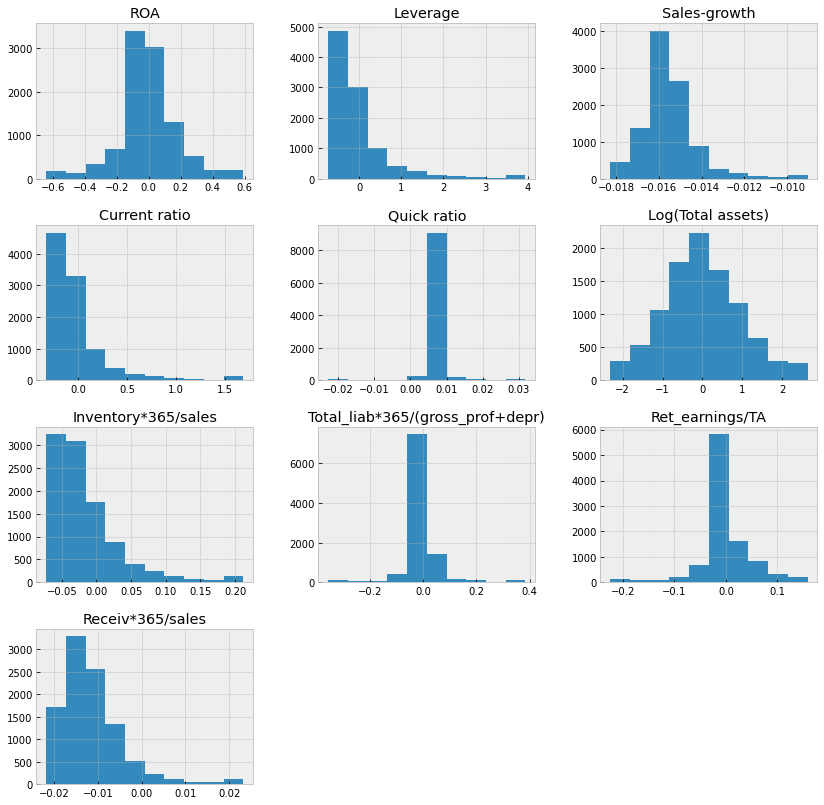

In [82]:
table_df.hist(figsize=(14,14))
plt.show()

With **corr()** you can check the correlations. There is multicollinearity present, but for example with ensemble methods, multicollinearity is much less of a problem.

In [83]:
table_df.corr()

,ROA,Leverage,Sales-growth,Current ratio,Quick ratio,Log(Total assets),Inventory*365/sales,Total_liab*365/(gross_prof+depr),Ret_earnings/TA,Receiv*365/sales
ROA,1.000000,0.253631,0.198471,0.239780,0.073774,-0.022929,-0.199351,0.031788,0.482101,-0.088218
Leverage,0.253631,1.000000,-0.062703,0.678369,0.137512,0.092470,0.017957,-0.088598,0.277234,-0.007704
Sales-growth,0.198471,-0.062703,1.000000,-0.050987,0.008612,0.124345,-0.080525,0.005148,0.008116,-0.018546
Current ratio,0.239780,0.678369,-0.050987,1.000000,0.175938,-0.055648,0.143823,-0.059035,0.169986,0.097054
Quick ratio,0.073774,0.137512,0.008612,0.175938,1.000000,-0.009259,-0.067865,-0.067402,0.071122,0.026820
Log(Total assets),-0.022929,0.092470,0.124345,-0.055648,-0.009259,1.000000,0.065786,0.009114,0.199229,0.116596
Inventory*365/sales,-0.199351,0.017957,-0.080525,0.143823,-0.067865,0.065786,1.000000,0.026625,-0.109237,0.154436
Total_liab*365/(gross_prof+depr),0.031788,-0.088598,0.005148,-0.059035,-0.067402,0.009114,0.026625,1.000000,0.005612,0.018199
Ret_earnings/TA,0.482101,0.277234,0.008116,0.169986,0.071122,0.199229,-0.109237,0.005612,1.000000,-0.052223
Receiv*365/sales,-0.088218,-0.007704,-0.018546,0.097054,0.026820,0.116596,0.154436,0.018199,-0.052223,1.000000


The predictors are everything else but ROA, which is our predicted variable.

In [84]:
X = table_df.drop(['ROA'],axis=1)

In [85]:
y = table_df['ROA']

In [86]:
from sklearn.model_selection import train_test_split

Let's make things difficult for OLS (very small train set). Here we use only 1 % of the data for training to demonstrate the strengths of ridge and lasso regression, which are usually usefuly only when n is close to p.

In [87]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=1)

In [88]:
len(X_train)

100

### Regression

#### Linear model

Although Scikit-learn is a ML library, it is possible to do a basic linear regression analysis with it. (All ML methods are statistical methods. The separation between them is artificial.)
![Linear_regression](./images/Linear_regression.svg)

In [89]:
import sklearn.linear_model as sk_lm

We define our LinearRegression object.

In [90]:
model = sk_lm.LinearRegression()

**fit()** can be used to fit the data.

In [91]:
model.fit(X_train,y_train)

LinearRegression()

**coef_** -attribute has the coefficients of each variable and **intercept_** has the intercept of the linear regression model.

In [92]:
model.coef_

array([-4.95131952e-03, -2.16483361e+01,  2.56318923e-01,  1.57522210e+00,
       -9.94242834e-03, -4.97093290e-01,  7.12480216e-02,  1.56827847e+00,
       -2.12876691e+00])

In [93]:
model.intercept_

-0.3581128448264698

**score()** can be used to measure the coefficient of determination of the trained model. How much our variables are explaining of the variation of the predicted variable.*

In [94]:
model.score(X_test,y_test)

0.14662911115789934

A short code to draw scatter charts between every feature and ROA. The blue dots are the correct values and the red dots are the predictions of the model.

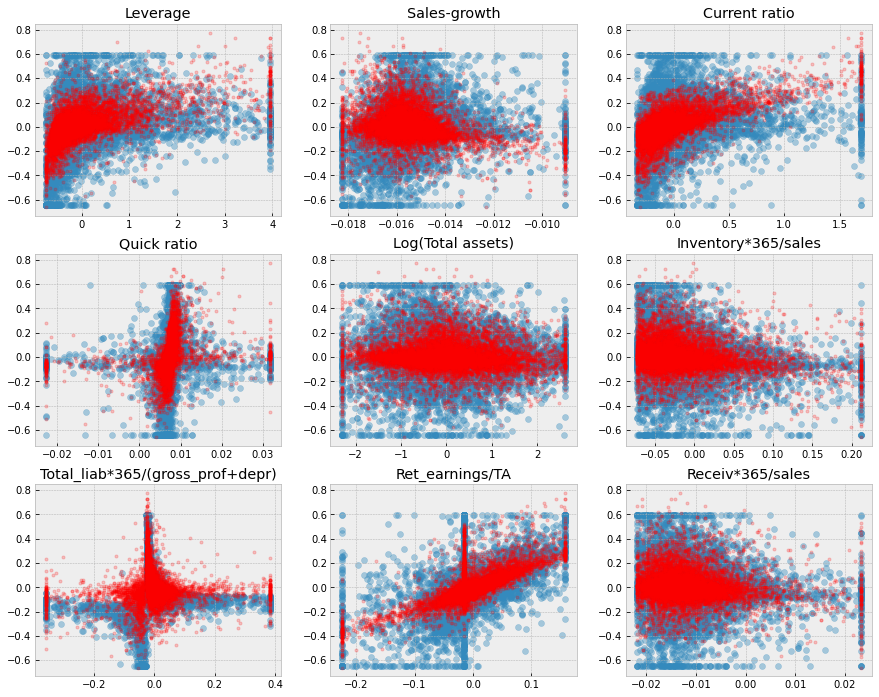

In [95]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.4)
    ax.plot(X_test[feature],model.predict(X_test),'r.',alpha=0.2)
    ax.set_title(feature)

Mean squared error can be used to the measure the performance. Less is better.

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
mean_squared_error(y_test,model.predict(X_test))

0.029838723728760376

#### Ridge regression

Ridge regression counters overfitting by adding a penalty on the size if the coefficients of the standard linear regression model. So it is a regularisation method.

![Regularisation](./images/Regularization.svg)

We can optimise the alpha parameter of the error function automatically using **RidgeCV**.

![Ridge_alpha](./images/ridge_alpha.png)

In [98]:
alpha_set = np.logspace(-5,5,20)

In [99]:
ridgecv = sk_lm.RidgeCV(alphas = alpha_set,cv=10, scoring = 'neg_mean_squared_error', normalize = True)

Otherwise similar steps. Define the object, use the **fit()** function, analyse the results with **coef_**, **intercept_**, **score()** and **mean_squared_error()**.

In [100]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

As you can see, the coefficients have decreases. But only a little.

In [101]:
ridgecv.coef_

array([ 2.50744525e-02, -1.39381411e+01,  1.30736089e-01,  4.81161991e-01,
       -7.84082924e-03, -3.00898196e-01,  7.75623294e-02,  1.00070461e+00,
       -1.68304267e+00])

In [102]:
ridgecv.intercept_

-0.22779312775441007

In [103]:
ridgecv.alpha_

0.5455594781168515

The coefficient of determination is now much improved (linear regression ~0.15).

In [104]:
ridgecv.score(X_test,y_test)

0.2035076502930907

Ridge regression decreases  the variation of predictions.

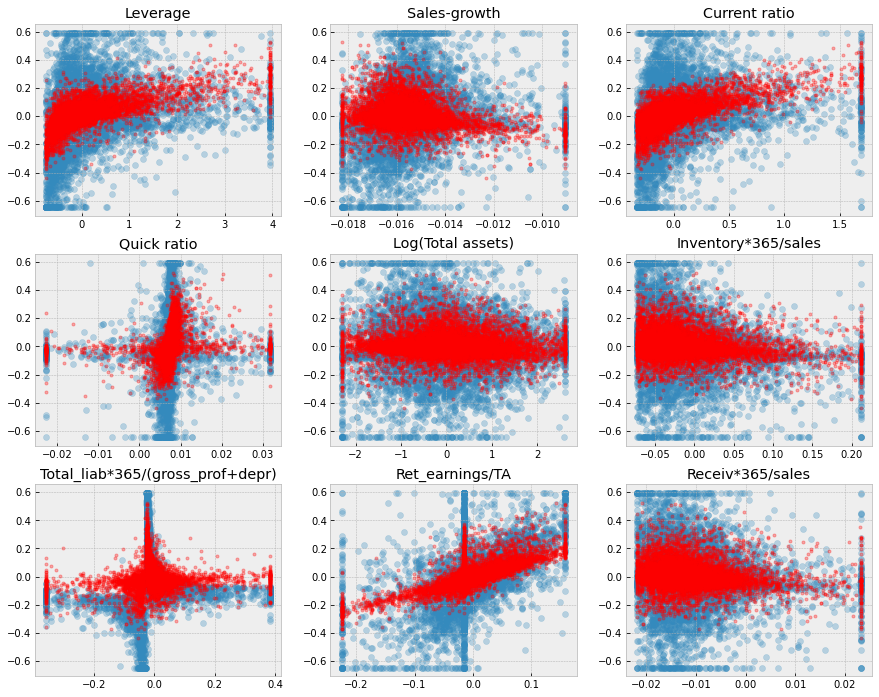

In [105]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.3)
    ax.plot(X_test[feature],ridgecv.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

MSE has also improved.

In [106]:
mean_squared_error(y_test,ridgecv.predict(X_test))

0.027849924910402172

#### The Lasso

Let's try next the lasso. It uses stronger regularisation (the absolute values of parameters in the regularisation term)

In [107]:
alpha_set = np.logspace(-5,5,21)

In [108]:
lassocv = sk_lm.LassoCV(alphas = None,cv=5,max_iter=100000, normalize = True)

In [109]:
lassocv.fit(X_train,y_train)

LassoCV(cv=5, max_iter=100000, normalize=True)

Lasso is different in that it decreases the coefficients of variables more easily to zero.

In [110]:
lassocv.coef_

array([ 0.        , -3.47515588,  0.17823162,  0.        , -0.        ,
       -0.10806394,  0.        ,  1.17143038, -0.        ])

In [111]:
lassocv.intercept_

-0.036391709169603666

In [112]:
lassocv.alpha_

0.002034766231861985

Now the coefficient of determination is even better.

In [113]:
lassocv.score(X_test,y_test)

0.2216681597092679

As you can see from the figure below. Regularisation decreases the sizes of parameters and this decreases the variation of predictions.

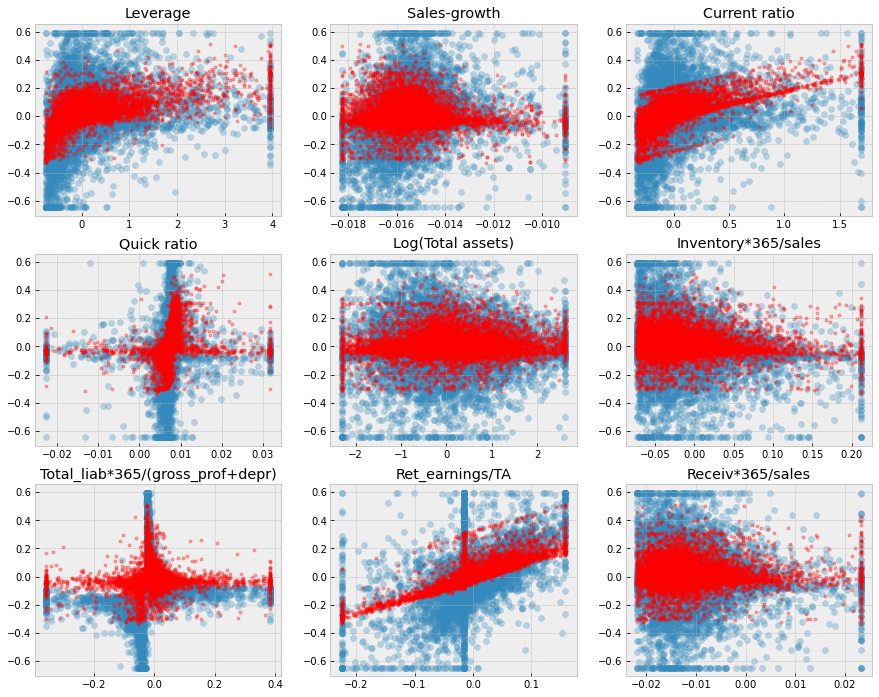

In [114]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.3)
    ax.plot(X_test[feature],lassocv.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

MSE has also improved.

In [115]:
mean_squared_error(y_test,lassocv.predict(X_test))

0.02721492970453322

By using larger alpha value, we can force more variables to zero.

In [116]:
lasso_model = sk_lm.Lasso(alpha = 0.003,max_iter=100000, normalize = True)

In [117]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.003, max_iter=100000, normalize=True)

Now only two coefficients in our model are different from zero (Current ratio and Retained earnings / Total assets)

In [118]:
lasso_model.coef_

array([ 0.        , -0.        ,  0.14767181,  0.        , -0.        ,
       -0.        ,  0.        ,  0.98729175, -0.        ])

In [119]:
lasso_model.intercept_

0.017635888536608735

The score decreases a little because we are forcing alpha to be *too* large.

In [120]:
lasso_model.score(X_test,y_test)

0.21680467823704752

Now the variation is even smaller.

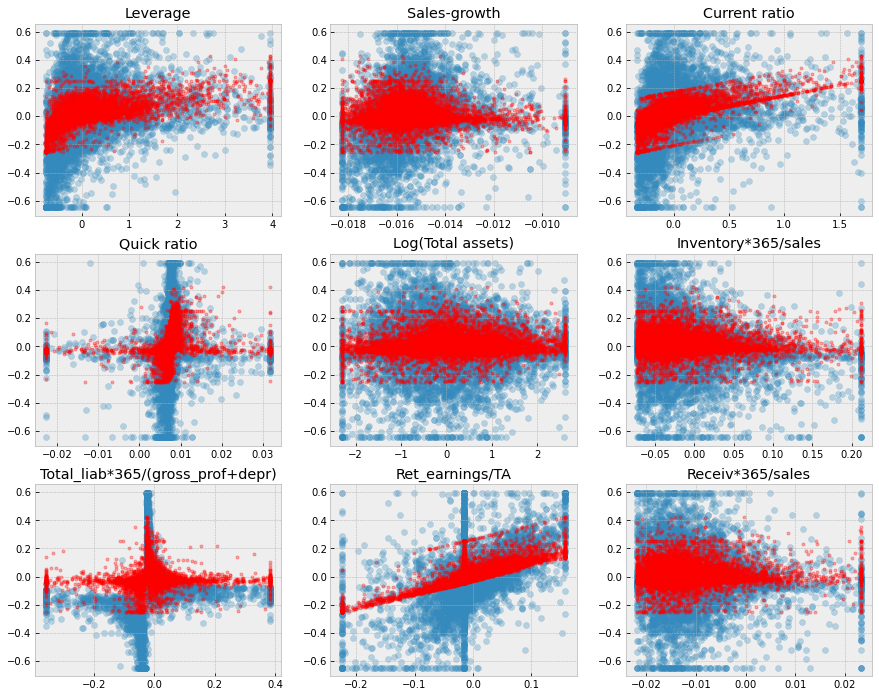

In [121]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.3)
    ax.plot(X_test[feature],lasso_model.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

In [122]:
mean_squared_error(y_test,lasso_model.predict(X_test))

0.027384984814107477

#### Linear reference model

In the following, we use a more reasonable division between training and testing datasets. With so large data, there is no need for Ridge or Lasso regularisation and we use a basic linear model as a reference. 80% / 20% -split is commonly used.

In [123]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The same steps as before.

In [124]:
ref_model = sk_lm.LinearRegression()

In [125]:
ref_model.fit(X_train,y_train)

LinearRegression()

With 8000 observations (instead of 100) we get a much better model.

In [126]:
ref_model.score(X_test,y_test)

0.3624295454797145

In [127]:
mean_squared_error(y_test,ref_model.predict(X_test))

0.022571114141273257

#### Random forest

Random forest has proven to be a very powerful prediction model.

In [128]:
from sklearn.ensemble import RandomForestRegressor

The strength of Scikit-learn is that the steps for building a model are similar for every model. Define an object, fit it to data, analyse the results.

In [129]:
r_forest_model = RandomForestRegressor(random_state=0)

In [130]:
r_forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

With the RF model, there is a much better fit between the predicted values and the correct test values.

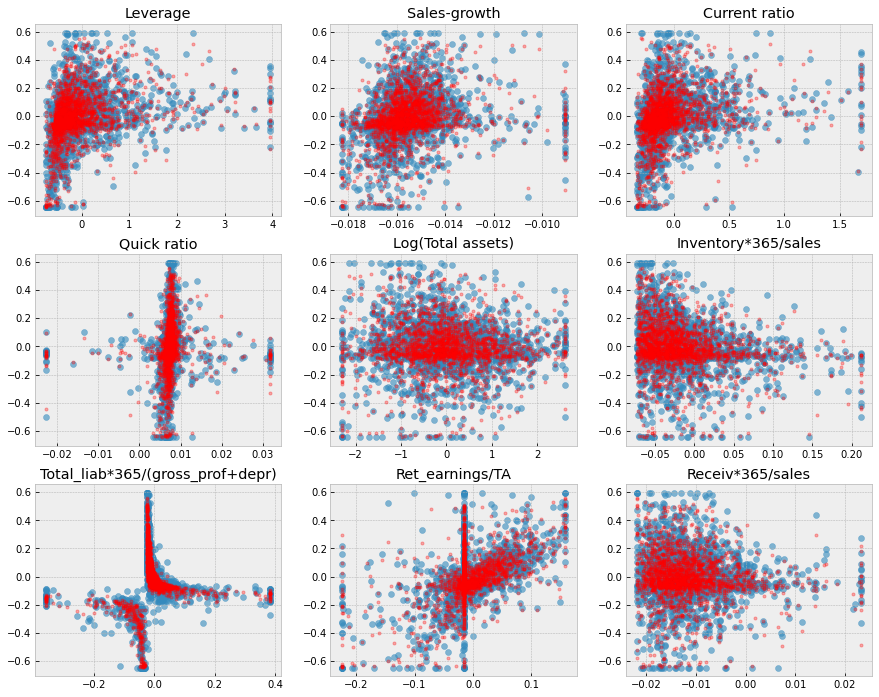

In [131]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.6)
    ax.plot(X_test[feature],r_forest_model.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

Scikit-Learn has a **feature_importances_** attribute to explain the importance of different parameters in explaining the predictions.

In [132]:
pd.DataFrame([X_train.columns,r_forest_model.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
6,Total_liab*365/(gross_prof+depr),0.770332
0,Leverage,0.133692
7,Ret_earnings/TA,0.018621
1,Sales-growth,0.0143994
4,Log(Total assets),0.0143823
5,Inventory*365/sales,0.0132926
3,Quick ratio,0.0132356
2,Current ratio,0.0114439
8,Receiv*365/sales,0.0106012


The coefficient of determination and MSE are significantly better with the RF model.

In [133]:
r_forest_model.score(X_test,y_test)

0.8716395282587384

In [134]:
mean_squared_error(y_test,r_forest_model.predict(X_test))

0.004544186196770379

### Gradient boosting

Random forest and gradient boosting are often the best ensemble models in applications. The gradient boosting model is defined using the same steps.

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
gradient_model = GradientBoostingRegressor(random_state=0)

In [137]:
gradient_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=0)

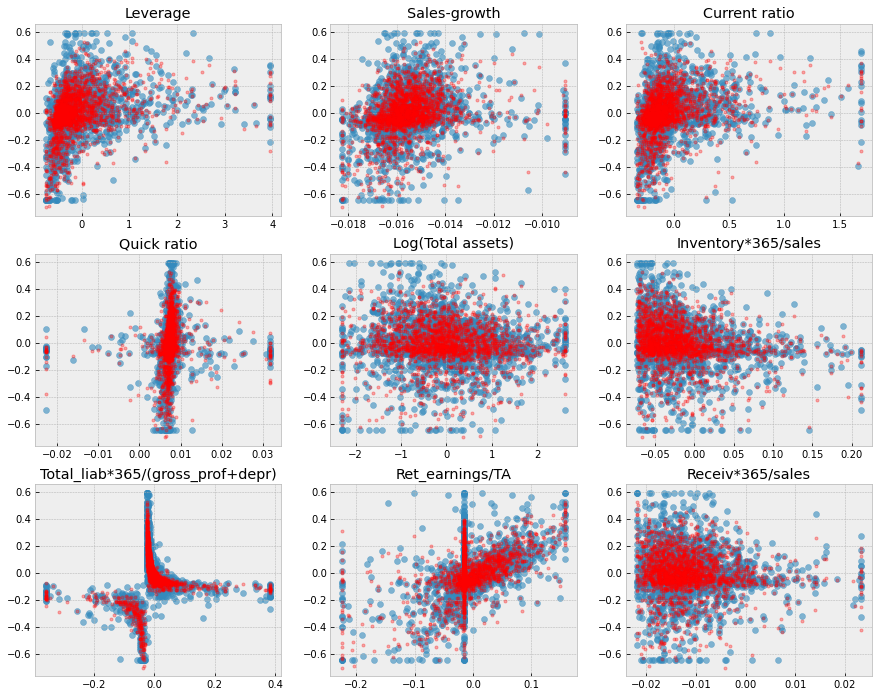

In [138]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.6)
    ax.plot(X_test[feature],gradient_model.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

In [139]:
pd.DataFrame([X_train.columns,gradient_model.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
6,Total_liab*365/(gross_prof+depr),0.850534
0,Leverage,0.0767628
7,Ret_earnings/TA,0.0379815
1,Sales-growth,0.0168338
4,Log(Total assets),0.00885142
3,Quick ratio,0.00280972
5,Inventory*365/sales,0.0025788
2,Current ratio,0.00189644
8,Receiv*365/sales,0.0017513


This time, the random forest model wins the competition.

In [140]:
gradient_model.score(X_test,y_test)

0.8444020113327864

In [141]:
mean_squared_error(y_test,gradient_model.predict(X_test))

0.0055084421454295604